# KNN & SVC

Explorando 20 rodadas de classificação com `KNN` e `SVC` em sua configuração padrão com os dataframes `chb12.csv` e `chb12dwt.csv`.

> configuração padrão do [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) e do [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) de acordo com a documentação da API.

As sementes geradas no início são usadas para que, em uma mesma rodada, ambos os classificadores recebam a mesma distribuição do mesmo dataframe

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.random.randint(0, 8000, 20)
print(f'seeds: {seed_array}')

seeds: [ 777 7472  177 5457 5828 3018 5148 1543 4777  452 7494 7836 7167 2124
 7778 2381 3145 3185 6015 7667]


## 20 rodadas

20 rodadas de classificação com as 4 combinações possíveis de classificador (`KNN` e `SVC`) com dataframe (`sem_dwt` e `com_dwt`)

In [2]:
chb12_nodwt_DF = pd.read_csv('./chb12.csv')
target_nodwt_S = chb12_nodwt_DF.pop('target')

chb12_dwt_DF = pd.read_csv('./chb12dwt.csv')
target_dwt_S = chb12_dwt_DF.pop('target')

accuracy_DF = pd.DataFrame()

datasets = {
    'sem_dwt':[chb12_nodwt_DF, target_nodwt_S],
    'com_dwt':[chb12_dwt_DF, target_dwt_S]
}

models = [KNeighborsClassifier, SVC]

print(f'chb12 shape: {chb12_nodwt_DF.shape} - chb12dwt shape: {chb12_dwt_DF.shape}')

for classifier in models:
    for key in datasets:
        data, target = datasets[key]

        X, y = data.values, target.values

        acc = []
        for rodada, seed in enumerate(seed_array):
            # Distribuindo os dados
            X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

            if classifier == SVC:
                sc = StandardScaler().fit(X_pre_train)
                X_train = sc.transform(X_pre_train)
                X_test = sc.transform(X_pre_test)
            else:
                X_train = X_pre_train
                X_test = X_pre_test
            
            # Instanciando e treinando classificador
            sk_model = classifier().fit(X_train, y_train)

            # Realizando classificação
            y_pred = sk_model.predict(X_test)

            # Adicionando resultados às respectivas listas
            accuracy = sk_model.score(X_test, y_test)
            acc.append(accuracy)

            # Exibindo resultados
            print(f'Dataset: {key} - Rodada: {rodada} - seed: {seed} - acurácia: {accuracy}\n')

            print(classification_report(y_test, y_pred, target_names=['negativo', 'positivo']))
        
        model_name = 'SCV' if classifier == SVC else 'KNN'
        accuracy_DF[f'{model_name}-{key}'] = acc

accuracy_DF

chb12 shape: (952, 126) - chb12dwt shape: (952, 756)
Dataset: sem_dwt - Rodada: 0 - seed: 777 - acurácia: 0.9090909090909091

              precision    recall  f1-score   support

    negativo       0.88      0.93      0.91       138
    positivo       0.94      0.89      0.91       148

    accuracy                           0.91       286
   macro avg       0.91      0.91      0.91       286
weighted avg       0.91      0.91      0.91       286

Dataset: sem_dwt - Rodada: 1 - seed: 7472 - acurácia: 0.8986013986013986

              precision    recall  f1-score   support

    negativo       0.88      0.92      0.90       144
    positivo       0.92      0.87      0.90       142

    accuracy                           0.90       286
   macro avg       0.90      0.90      0.90       286
weighted avg       0.90      0.90      0.90       286

Dataset: sem_dwt - Rodada: 2 - seed: 177 - acurácia: 0.9055944055944056

              precision    recall  f1-score   support

    negativo      

,KNN-sem_dwt,KNN-com_dwt,SCV-sem_dwt,SCV-com_dwt
0,0.909091,0.902098,0.940559,0.989510
1,0.898601,0.895105,0.944056,0.993007
2,0.905594,0.926573,0.944056,0.989510
3,0.923077,0.933566,0.954545,0.989510
4,0.940559,0.923077,0.933566,0.982517
5,0.919580,0.930070,0.944056,0.993007
6,0.905594,0.944056,0.944056,0.996503
7,0.884615,0.895105,0.937063,0.993007
8,0.898601,0.930070,0.933566,0.993007
9,0.902098,0.909091,0.930070,0.993007


,KNN-sem_dwt,KNN-com_dwt,SCV-sem_dwt,SCV-com_dwt
count,20.000000,20.000000,20.000000,20.000000
mean,0.906469,0.913287,0.943007,0.992133
std,0.015795,0.016463,0.011740,0.004520
min,0.881119,0.874126,0.923077,0.982517
25%,0.897727,0.902098,0.936189,0.989510
50%,0.905594,0.912587,0.942308,0.993007
75%,0.911713,0.927448,0.949301,0.993881
max,0.940559,0.944056,0.968531,1.000000


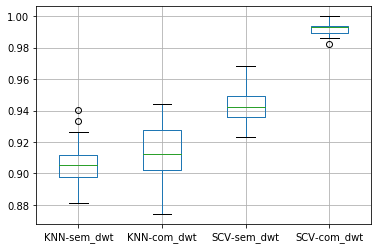

In [3]:
accuracy_DF.boxplot()
accuracy_DF.describe()